In [13]:
import torch
from xopt import Xopt

YAML="""
xopt: {}
generator:
    name: BayesianExploration
    options:
        n_initial: 5
        optim:
            num_restarts: 1
        acq:
            proximal_lengthscales: [1.5, 1.5]

evaluator:
    name: test_TNK
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    constants: {a: dummy_constant}

"""


In [14]:
X = Xopt()
X.from_yaml(YAML)
X.step()

for i in range(20):
    print(f'step {i}')
    X.step()

step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19


In [15]:
X.data

,x1,x2,a,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
0,0.502246,0.346180,dummy_constant,0.502246,0.346180,-0.530564,0.023666,"[1, 2, 3]",False,
1,2.574430,0.448409,dummy_constant,2.574430,0.448409,5.921534,4.305920,"[1, 2, 3]",False,
2,1.344248,0.754450,dummy_constant,1.344248,0.754450,1.408506,0.777500,"[1, 2, 3]",False,
3,0.610460,2.502250,dummy_constant,0.610460,2.502250,5.711228,4.021206,"[1, 2, 3]",False,
4,2.062019,0.764128,dummy_constant,2.062019,0.764128,3.753568,2.509668,"[1, 2, 3]",False,
5,1.262920,0.655941,dummy_constant,1.262920,0.655941,1.006394,0.606364,"[1, 2, 3]",False,
6,1.170436,0.630463,dummy_constant,1.170436,0.630463,0.772551,0.466505,"[1, 2, 3]",False,
7,1.180880,0.538747,dummy_constant,1.180880,0.538747,0.600274,0.465099,"[1, 2, 3]",False,
8,1.063690,0.378845,dummy_constant,1.063690,0.378845,0.205920,0.332426,"[1, 2, 3]",False,
9,0.945641,0.424351,dummy_constant,0.945641,0.424351,-0.015037,0.204319,"[1, 2, 3]",False,


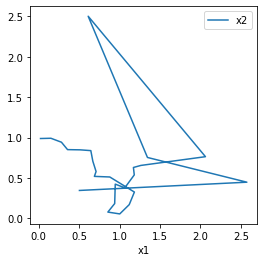

In [16]:
# plot results
ax = X.data.plot("x1","x2")
ax.set_aspect('equal')

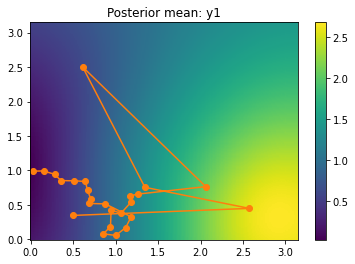

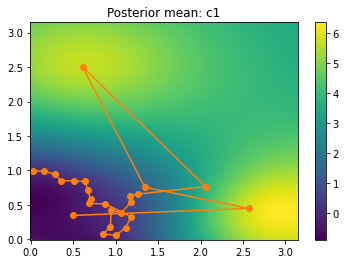

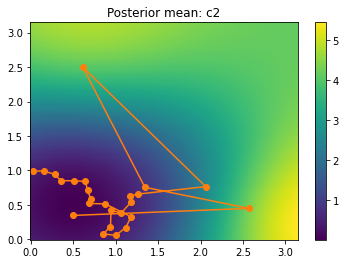

In [17]:
from matplotlib import pyplot as plt# plot model predictions
data = X.data

bounds = X.generator.vocs.bounds
model = X.generator.model

# create mesh
n = 200
x = torch.linspace(*bounds.T[0],n)
y = torch.linspace(*bounds.T[1],n)
xx,yy = torch.meshgrid(x,y)
pts = torch.hstack([ele.reshape(-1,1) for ele in (xx,yy)]).double()

outputs = X.generator.vocs.output_names
with torch.no_grad():
    post = model.posterior(pts)

    mean = post.mean
    for i in range(mean.shape[-1]):
        fig,ax = plt.subplots()
        ax.plot(*data[["x1","x2"]].to_numpy().T,'o-C1')
        c = ax.pcolor(xx, yy, mean[:, i].reshape(n,n))
        fig.colorbar(c)
        ax.set_title(f'Posterior mean: {outputs[i]}')


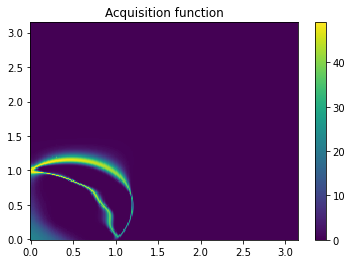

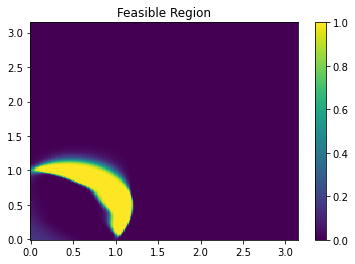

In [18]:
from xopt.generators.bayesian.utils import feasibility

acq_func = X.generator.get_acquisition(model)
with torch.no_grad():
    acq_pts = pts.unsqueeze(1)
    acq = acq_func(acq_pts)

    fig, ax = plt.subplots()
    c = ax.pcolor(xx,yy,acq.reshape(n,n))
    fig.colorbar(c)
    ax.set_title('Acquisition function')

    feas = feasibility(
        pts.unsqueeze(1),
        model,
        X.generator.sampler,
        X.vocs
    ).flatten()

    fig2, ax2 = plt.subplots()
    c = ax2.pcolor(xx,yy,feas.reshape(n,n))
    fig2.colorbar(c)
    ax2.set_title('Feasible Region')